In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### reading data

In [95]:
df=pd.read_csv("data_prepared_model.csv")

In [96]:
df.head()

,Rating,Type of ownership,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary
0,3.8,Company - Private,$50 to $100 million (USD),0.0,0.0,NM,0.0,50.0,1.0,0.0,0.0,0.0,1.0,501-1000,data scientist,2536.0,72.0
1,3.4,Other Organization,$2 to $5 billion (USD),0.0,0.0,MD,0.0,39.0,1.0,0.0,0.0,0.0,0.0,10000+,data scientist,4783.0,87.5
2,4.8,Company - Private,$100 to $500 million (USD),0.0,0.0,FL,1.0,13.0,1.0,0.0,1.0,0.0,1.0,501-1000,data scientist,3461.0,85.0
3,3.8,Government,$500 million to $1 billion (USD),0.0,0.0,WA,1.0,58.0,1.0,0.0,0.0,0.0,0.0,1001-5000,data scientist,3883.0,76.5
4,2.9,Company - Private,Unknown / Non-Applicable,0.0,0.0,NY,1.0,25.0,1.0,0.0,0.0,0.0,1.0,51-200,data scientist,2728.0,114.5


In [97]:
df.isna()

,Rating,Type of ownership,Revenue,hourly,employer_provided,job_state,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,size_number,job_simp,desc_len,avg_salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
463,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
464,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [98]:
df.loc[466]

Rating               2.75
Type of ownership     NaN
Revenue               NaN
hourly                NaN
employer_provided     NaN
job_state             NaN
same_state            NaN
age                   NaN
python_skill          NaN
rstudio_skill         NaN
spark_skill           NaN
aws_skill             NaN
excel_skill           NaN
size_number           NaN
job_simp              NaN
desc_len              NaN
avg_salary            NaN
Name: 466, dtype: object

In [99]:
df.drop(466,axis=0,inplace=True)

### converting categorical to numeric variables

In [100]:
### converting categorical to numeric variables
df_dummies=pd.get_dummies(df,drop_first=True)

In [101]:
df_dummies.shape

(466, 79)

In [102]:
df_dummies.head()

,Rating,hourly,employer_provided,same_state,age,python_skill,rstudio_skill,spark_skill,aws_skill,excel_skill,...,job_state_ WI,size_number_10000+,size_number_1001-5000,size_number_201-500,size_number_5001-10000,size_number_501-1000,size_number_51-200,size_number_Unknown,job_simp_data scientist,job_simp_scientist
0,3.8,0.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0
1,3.4,0.0,0.0,0.0,39.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,4.8,0.0,0.0,1.0,13.0,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,1,0,0,1,0
3,3.8,0.0,0.0,1.0,58.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,2.9,0.0,0.0,1.0,25.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


### Splitting data

In [159]:
#### feature selection
X=df_dummies.drop("avg_salary",axis=1)
y=df_dummies["avg_salary"]

In [160]:
print("X shape",X.shape)
print("y shape",y.shape)

X shape (466, 78)
y shape (466,)


In [161]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)

X_train (372, 78)
X_test (94, 78)
y_train (372,)
X_test (94, 78)


### multiple linear regression from statsmodel

In [163]:
#### using multiple linear regression from statsmodel
import statsmodels.api as sm
X_sm=X=sm.add_constant(X)
model=sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     4.624
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           2.95e-24
Time:                        11:15:57   Log-Likelihood:                -2194.4
No. Observations:                 466   AIC:                             4547.
Df Residuals:                     387   BIC:                             4874.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               32.1998     26.868      1.198      0.231     -20.625      85.025
Rating                                               7.8245      2.758      2.837      0.005       2.401      13.248
hourly                                             -58.9183     12.499     -4.714      0.000     -83.492     -34.345
employer_provided                                   30.5023     13.467      2.265      0.024       4.024      56.980
same_state                                          -0.0471      3.457     -0.014      0.989      -6.844       6.750
age                                                  0.0069      0.040      0.172      0.864      -0.072       0.086
python_skill                                        10.1177      3.537      2.861      0.004       3.164      17.072
rstudio_skill                                      -29.0053     31.329     -0.926      0.355     -90.601      32.590
spark_skill                                          3.6172      3.909      0.925      0.355      -4.069      11.303
aws_skill                                            4.2666      3.721      1.147      0.252      -3.049      11.582
excel_skill                                         -4.2287      3.122     -1.355      0.176     -10.367       1.909
desc_len                                             0.0004      0.001      0.420      0.675      -0.002       0.003
Type of ownership_Company - Private                -15.0858     15.624     -0.966      0.335     -45.804      15.632
Type of ownership_Company - Public                  -8.7631     15.975     -0.549      0.584     -40.172      22.646
Type of ownership_Government                       -21.8800     21.595     -1.013      0.312     -64.339      20.579
Type of ownership_Hospital                         -26.1743     21.237     -1.233      0.219     -67.928      15.579
Type of ownership_Nonprofit Organization           -32.9761     16.384     -2.013      0.045     -65.189      -0.763
Type of ownership_Other Organization               -14.0500     25.970     -0.541      0.589     -65.109      37.009
Type of ownership_School / School District         -25.4713     28.606     -0.890      0.374     -81.714      30.771
Type of ownership_Subsidiary or Business Segment    -5.3055     16.642     -0.319      0.750     -38.025      27.414
Type of ownership_Unknown                          -33.6585     36.504     -0.922      0.357    -105.429      38.112
Revenue_$1 to $5 million (USD)                      -3.7662     16.330     -0.231      0.818     -35.872      28.340
Revenue_$10 to $25 million (USD)                   -11.4495     10.264     -1.115      0.265     -31.630       8.731
Revenue_$10+ billion (USD)               

### Linear regression from sklearn

In [164]:
### 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

-26.49871471904362

### Lasso regression

In [165]:
lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

-25.366192431413165

### finding relevant alpha

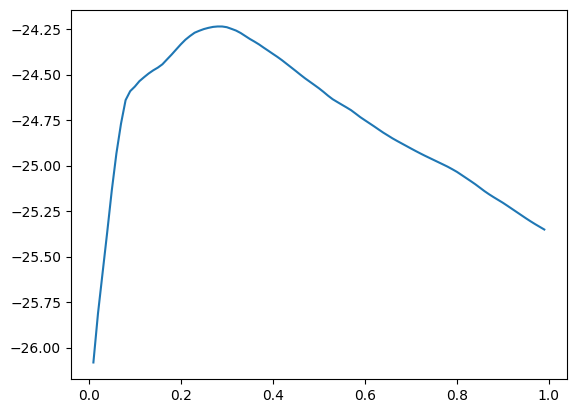

In [166]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))
    
plt.plot(alpha,error)

In [167]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
27,0.28,-24.235484


In [168]:
lm_l = Lasso(alpha=0.25)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

-24.249814399971257

### RandomForestRegressor Algorithm

In [169]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 5))


-24.795292432432433

### tune models GridsearchCV 

In [170]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

print(gs.best_score_)
print(gs.best_estimator_)


-24.7505376344086
RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=30)


In [177]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

### test ensemble

In [172]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [173]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

print(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

23.55182026002274
21.673841916804715
20.590602836879434
20.66793590490929


In [174]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )